In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from data_locator import *
import numpy as np

In [3]:
path = find_viewer_file('Examples\R_L_test_difficult_SIMULATIONS\Simulation0_SIM_SIMULATIONS')

with open(path, "r") as f:
    lines = f.readlines()

In [4]:
split_file = []
times = []
current_list = []

for line in lines:
    if line == 'SCENE\n':
        split_file.append(current_list)
        current_list = []
    if line[0:2] == 'ID':
        current_list.append(line.strip()[3:])
    if line[0:11] == 'SceneNumber':
        times.append(line.split('\t')[3][:-1])
split_file.append(current_list)
_ = split_file.pop(0)

In [5]:
for i, scene in enumerate(split_file):
    for j, row in enumerate(scene):
        split_file[i][j] = row.split('\t')

In [6]:
data_frame_list = []

column_list = ['ID', 'Unknown', 'Color', 'X', 'Y', 'Z']

for scene in split_file:
    data_frame_list.append(pd.DataFrame(scene, columns=column_list))

In [7]:
def average_Z(df, color):
    color_df = df[df['Color'] == color]
    return color_df['Z'].astype(float).mean()

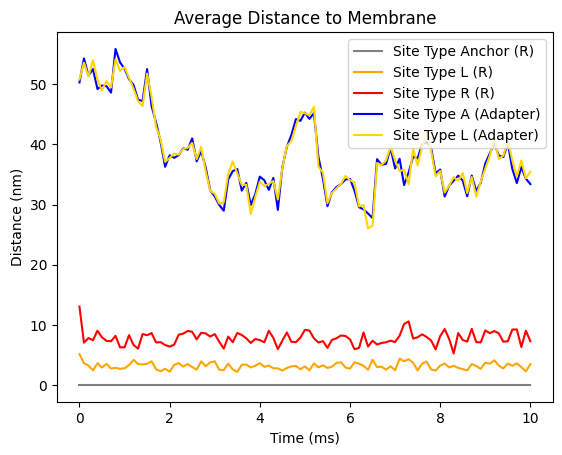

In [11]:
color_list = list(data_frame_list[0]['Color'].unique())
#color_list = ['RED', 'ORANGE', 'BLUE']

z_values = []

for color in color_list:
    line = []
    for data_frame in data_frame_list:
        line.append(average_Z(data_frame,color))
    z_values.append([color, line])

for line in z_values:
    plt.plot([float(time)*1000 for time in times], line[1], color=line[0].replace('_','').lower())

plt.title('Average Distance to Membrane')
plt.xlabel('Time (ms)')
plt.ylabel('Distance (nm)')

#Have to add label manually since there can be multiple distinct sites with the same color
plt.legend(['Site Type Anchor (R)', 'Site Type L (R)', 'Site Type R (R)', 'Site Type A (Adapter)', 'Site Type L (Adapter)']) 

plt.show()